# Where Should I Live?

## Programming for Data Science - Group Project (2025/2026)

 **Group 03 Members**

- 20231796  -  Ilham El Fars 
- 20241026  -  Sharidi Ashwari Peiris 
- 20240648  -  Yuwei Guan

GitHub link: https://github.com/izziebel/citymap 

This Project aims to support decision-making about where to live in Europe by analyzing economic, demographic, and quality-of-life indicators for European cities. 

Through Data Wrangling, Visualization, Web Scraping, and Interactive tools, we translate complex data into clear and actionable insights for different user profiles.

### Environment & Versions

In [1]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests 
import time
import re

from bs4 import BeautifulSoup
import bs4

import geopandas as gpd     

from sklearn.preprocessing import MinMaxScaler 
import sklearn

import plotly.express as px
import plotly

In [2]:
# Versions of the packages used

print("pandas:", pd.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("numpy:", np.__version__)
print("requests:", requests.__version__)
print("BeautifulSoup:", bs4.__version__)
print("geopandas:", gpd.__version__)
print("scikit-learn:", sklearn.__version__)
print("plotly", plotly.__version__)

pandas: 2.3.3
matplotlib: 3.10.7
numpy: 2.3.5
requests: 2.32.5
BeautifulSoup: 4.13.5
geopandas: 1.1.1
scikit-learn: 1.8.0
plotly 6.3.1


## 1) Data Wrangling and Analysis


### Load the dataset

We load the city dataset from 'city_data.csv' .
The dataset contains demographic, economic, and social indicators for European cities.

In [3]:
# The csv is '|' delimited and second row contains the real header (skiprows=1)
city_map = pd.read_csv('city_data.csv', sep='|', skiprows = 1)
city_map

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,309.0,2023-06-08 00:00:00


### Methodology Overview

The project is structured into 3 main phases : 
- First , the dataset is cleaned and preprocessed to ensure consistency and reliability. 
- Second, exploratory data analysis is performed to answer the assigned analytical questions and extract meaningful patterns. 
- Finally, advanced techniques such as web scraping and interactive map are used to enhane the analysis and support decision-making.

### Initial Inspection

We preview the dataset, check column names, and examine data types.
This helps to identify typos, missing values, and inconsistencies.

In [4]:
city_map.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


In [5]:
city_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

We correct a column typo **Avgerage** to **Average** and standardize column names before analysis.

In [6]:
# fix typos in the column name
city_map.rename(columns={'Avgerage Rent Price': 'Average Rent Price'}, inplace=True)
city_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [7]:
city_map.columns

Index(['City', 'Population Density', 'Population', 'Working Age Population ',
       'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Average Rent Price',
       'Average Cost of Living', 'Average Price Groceries',
       'Last Data Update'],
      dtype='object')

**Key columns used**

- 'City' - raw "City, Country" string to be cleaned
- Demographics - 'Population', 'Working Age Population', 'Youth Dependency Ratio'
- Economy - 'Unemployment Rate' ,'GDP per Capita', 'Average Monthly Salary','Average Cost of Living, 'Average Rent Price'
- Climate - 'Days of very strong heat stress'
- 'Main Spoken Lnaguages'

In [8]:
city_map.describe()

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries
count,85.000000,8.600000e+01,8.500000e+01,86.000000,85.000000,85.000000,86.000000,86.000000,86.000000,86.000000,6.000000
mean,1115.141176,1.754370e+06,1.158294e+06,24.096860,6.667059,51750.269647,4.348837,2434.488372,1070.104651,1808.383721,225.833333
std,2542.778533,1.843133e+06,1.232534e+06,3.266421,4.553632,21495.617843,10.038476,1188.602984,498.964576,727.999680,97.890585
min,65.000000,7.389500e+04,4.635900e+04,19.300000,1.400000,10089.920000,0.000000,750.000000,100.000000,800.000000,100.000000
25%,304.000000,5.281185e+05,3.580200e+05,21.425000,3.700000,38664.000000,0.000000,1412.500000,800.000000,1300.000000,147.500000
50%,548.000000,1.178397e+06,7.337940e+05,23.150000,5.300000,49329.000000,1.000000,2400.000000,1050.000000,1665.000000,243.000000
75%,1020.000000,2.315896e+06,1.534225e+06,25.925000,8.100000,63083.000000,3.000000,3200.000000,1250.000000,2100.000000,295.750000
max,20983.000000,1.239654e+07,8.274794e+06,37.800000,23.000000,146094.000000,59.000000,6636.000000,3190.000000,4862.000000,340.000000


### QUESTION 1

### Handle missing values and Duplicates


In [9]:
#check duplicates
print("Number of duplicates:")
print(city_map.duplicated().sum())

#remove duplicates
city_map.drop_duplicates(inplace=True)

print("Number of duplicates after remove:")
city_map.duplicated().sum()

Number of duplicates:
2
Number of duplicates after remove:


np.int64(0)

Duplicate record were identified and removed to avoid over-representing certain cities and to ensure that each city appears only once in the dataset.

In [10]:
city_map.isnull().sum()

City                                0
Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Average Price Groceries            78
Last Data Update                    0
dtype: int64

The column **Average Price Groceries** was removed because it contained over 90% of missing values. Only 6 non null values are present. 

Similar cost related information is already present in the dataset - **Average Cost of Living** and **Average Rent Price**. So droping this column prevents misleading imputations and simplies further analysis.

In [11]:
#remove the column almost empty
city_map.drop(columns=['Average Price Groceries'], inplace=True)

In [12]:
# use median to fill missing values in numeric columns
city_map[['Population Density', 'Working Age Population ', 'Unemployment Rate', 'GDP per Capita']] = \
    city_map[['Population Density', 'Working Age Population ', 'Unemployment Rate', 'GDP per Capita']].fillna(
        city_map[['Population Density', 'Working Age Population ', 'Unemployment Rate', 'GDP per Capita']].median()
    )

# use mode to fill missing values in categorical columns
city_map['Main Spoken Languages'] = city_map['Main Spoken Languages'].fillna(
    city_map['Main Spoken Languages'].mode()[0]
)
city_map.isnull().sum()

City                               0
Population Density                 0
Population                         0
Working Age Population             0
Youth Dependency Ratio             0
Unemployment Rate                  0
GDP per Capita                     0
Days of very strong heat stress    0
Main Spoken Languages              0
Average Monthly Salary             0
Average Rent Price                 0
Average Cost of Living             0
Last Data Update                   0
dtype: int64


Missing values were handled according to the nature and importance of each variable. 

- Drop columns with > 90% missing values (e.g: 'Average Price Groceries') , as imputing these values could introduce bias and distort comparisons between cities.
- Fill numeric columns with median values as median is robust to outliers in numeric fields.
- Fill categorical columns with mode values as mode preserves category distribution for languages. 

### QUESTION 2



 2. **a) Which country appears most frequently in the dataset? How many cities are associated with it?**

In [13]:
# 1) clean and split city into City_Name and Country 

m = city_map['City'].astype(str).str.extract(r'^(?P<p1>.*?)[,;.]\s*(?P<p2>.*)$')

def clean(x):
    return re.sub(r'[.]','', '' if pd.isna(x) else str(x)).strip()

p1 = m['p1'].apply(clean)   # usual city
p2 = m['p2'].apply(clean)   # usual country

# Known country / name normalizations
country_fix = {'Turkiye': 'Turkey'}
city_fix = {'Lefkosia': 'Nicosia', 'Lemesos':'Limassol', 'Gent':'Ghent'}

p2 = p2.replace(country_fix)
p1 = p1.replace(city_fix)


# Handle reverse entries like "Greece,Athens"

contry_coordinates = set(p2.dropna().unique().tolist())

City_Name = []
Country = []

for a,b in zip(p1,p2):
    # default : "City, Country"

    cname, ctry = a,b
    # if lookes reversed ( b not a country but looks like a country, we swap)
    if b not in contry_coordinates and a in contry_coordinates:
        ctry, cname = a,b

    # final clean
    cname = clean(cname)
    ctry = clean(ctry)

    # fix the case: "Greece, Athens"Arithens"
    if cname == "Greece" and ctry == "Athens":
        cname,ctry = "Athens","Greece"
    City_Name.append(cname)
    Country.append(ctry)

city_map["City_Name"] = City_Name
city_map["Country"] = Country


We split **'City'** into **'City_Name'** and **'Country'** handling commas, semicolons, stray punctuation, dots (eg. "Berlin. Germany").

We handled special cases ("Lefkosia - Nicosia", "Lemesos - Limassol", "Turkiye - Turkey")

In [14]:
# 2) Count the most frequent country

country_counts =city_map['Country'].value_counts(dropna=True)
most_freq_country = country_counts.index[0]   #first index = most frequent
num_cities_most_country = country_counts.iloc[0]  #first value = count

print(f'Most frequent country: {most_freq_country}')
print(f'Number of cities in most frequent country: {num_cities_most_country}')

Most frequent country: Germany
Number of cities in most frequent country: 10


2. **b) How many cities are present in total? How many are associated with
             Greece?**


In [15]:

total_cities = len(city_map)
Greece_countries = (city_map['Country']== 'Greece').sum()

print(f'Total number of cities: {total_cities}')
print(f'Number of cities associated with Greece: {Greece_countries}')

Total number of cities: 84
Number of cities associated with Greece: 2


2. **c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?**


In [16]:

langs = city_map['Main Spoken Languages'].dropna().str.split(',',expand= True)
langs = langs.stack().reset_index(drop=True)
langs = langs.str.strip()

#count each language

lang_counts =langs.value_counts()

#Least spoken and top 3 languages

least_spoken = lang_counts.idxmin()
top3_languages = lang_counts.head(3).index.tolist()


print(f'Least spoken language: {least_spoken}')

print(f'Top 3 most spoken languages: [{top3_languages}]')

Least spoken language: Estonian
Top 3 most spoken languages: [['English', 'German', 'Turkish']]


These results provide an overview of how countries and languages are represented in the dataset. Countries with a higher number of cities may disproportionately influence the analysis, which is important to consider when interpreting aggregate results.

In [17]:
city_map

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City_Name,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15 00:00:00,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03 00:00:00,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22 00:00:00,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09 00:00:00,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17 00:00:00,Ghent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11 00:00:00,Stockholm,Sweden
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10 00:00:00,Gothenburg,Sweden
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07 00:00:00,Malmo,Sweden
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08 00:00:00,Ankara,Turkey


### QUESTION 3

3. **a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?**

In [18]:
#Convert 'Last Data Update' to datetime

city_map['Last Data Update']  = pd.to_datetime(city_map['Last Data Update'])

#cities that require update

update = city_map[city_map['Last Data Update'] < '2023-04-01']

print(f'Entries uploaded before April 2023:\n',update['City'])

Entries uploaded before April 2023:
 10            Basel, Switzerland
18               Munich, Germany
20    Frankfurt am Main, Germany
38                 Lyon,  France
59                 Venice, Italy
82            Gothenburg, Sweden
Name: City, dtype: object


 3. b) How many days ago was the last update? On what day, month, and year did
            it occur?

In [19]:
#How many days ago was the last update

last_update = city_map['Last Data Update'].max()
print(f'Last update was on: {last_update.date()}')

# what day, month, and year did it occur?

year = last_update.year
month = last_update.month
day = last_update.day

print(f'Last update year: {year}')
print(f'Last update month: {month}')
print(f'Last update day: {day}')

days_ago = (pd.Timestamp('now') - last_update).days
print(f'How many days ago: {days_ago}')

Last update was on: 2024-12-12
Last update year: 2024
Last update month: 12
Last update day: 12
How many days ago: 374


Cities with data updated April 2023 may not accurately reflect current economic and social conditions. Therefore, results involving these cities should be interpreted with caution. The analysis of the most recent update also helps assess the overall freshness and reliability of the dataset.

### QUESTION 4

 4. **a) How are the Unemployment Rate and GDP per Capita distributed and
            related? What does this relationship suggest?** 

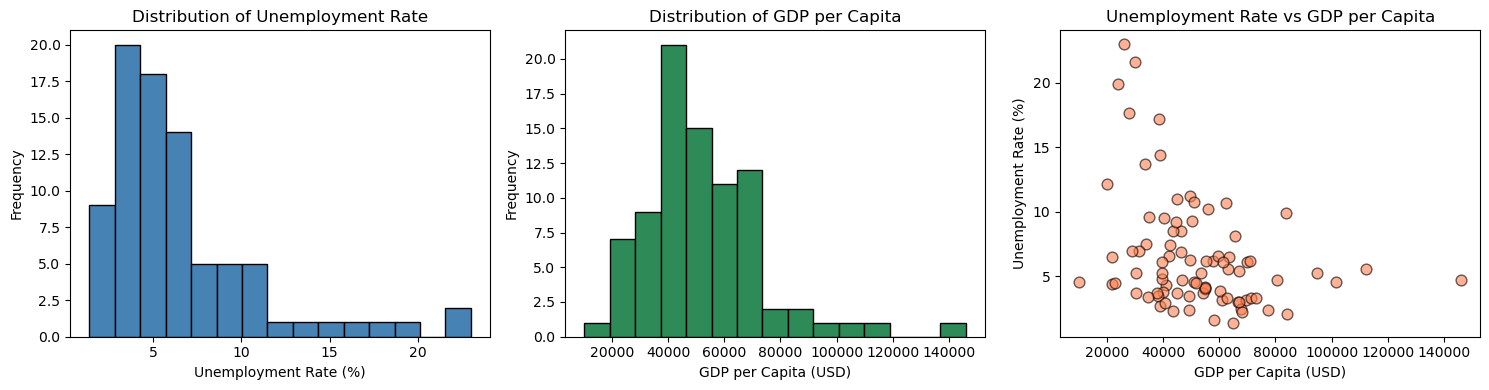


Correlation coefficient: -0.339


In [20]:
#Unemployment Rate vs GDP per Capita - Distribution and Relationship

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution of Unemployment Rate
axes[0].hist(city_map['Unemployment Rate'].dropna(), bins=15, edgecolor='black', color='steelblue')
axes[0].set_xlabel('Unemployment Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Unemployment Rate')

# Distribution of GDP per Capita
axes[1].hist(city_map['GDP per Capita'].dropna(), bins=15, edgecolor='black', color='seagreen')
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of GDP per Capita')

# Scatter plot - Relationship
axes[2].scatter(city_map['GDP per Capita'], city_map['Unemployment Rate'], 
                alpha=0.6, c='coral', edgecolors='black', s=60)
axes[2].set_xlabel('GDP per Capita (USD)')
axes[2].set_ylabel('Unemployment Rate (%)')
axes[2].set_title('Unemployment Rate vs GDP per Capita')

plt.tight_layout()
plt.savefig('q4a_unemployment_gdp.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate correlation
corr = city_map['Unemployment Rate'].corr(city_map['GDP per Capita'])
print(f"\nCorrelation coefficient: {corr:.3f}")

The correlation between Unemployment Rate and GDP per Capita is negative (approximately -0.3), suggesting that cities with higher GDP per capita tend to have lower unemployment rates.

This relationship aligns with economic theory: wealthier regions typically have more job opportunities.
However, the correlation is moderate, indicating other factors also influence unemployment.

4. **b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living?**

TOP 5 CITIES - Largest (Salary - Cost of Living):
City_Name     Country  Average Monthly Salary  Average Cost of Living  Salary_COL_Diff
    Basel Switzerland                    6366                    4239             2127
  Tampere     Finland                    3500                    1600             1900
 Helsinki     Finland                    3900                    2050             1850
   Zurich Switzerland                    6636                    4862             1774
   Geneva Switzerland                    5794                    4263             1531


TOP 5 COUNTRIES - Smallest Average (Salary - Cost of Living):
  Portugal: €-207.50
  Greece: €-125.00
  Slovak Republic: €-50.00
  Turkey: €-25.00
  Poland: €-16.67


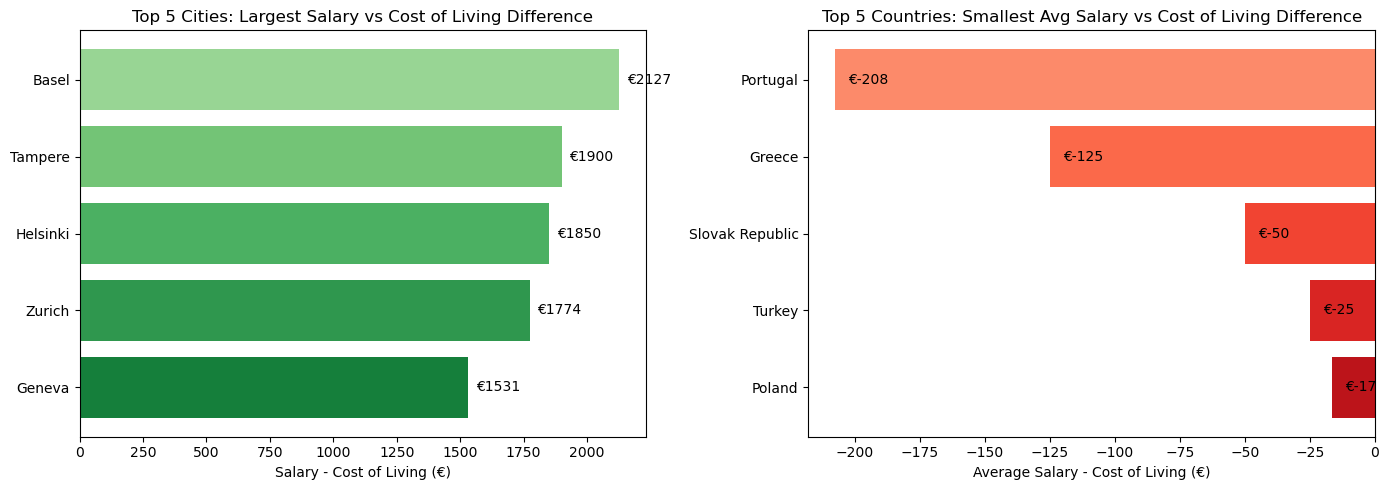

In [21]:
# Top 5 cities with largest salary-cost difference & Top 5 countries with smallest salary-cost difference

# Calculate difference: Salary - Cost of Living
city_map['Salary_COL_Diff'] = city_map['Average Monthly Salary'] - city_map['Average Cost of Living']

# Top 5 cities with LARGEST difference
top5_cities = city_map.nlargest(5, 'Salary_COL_Diff')[['City_Name', 'Country', 'Average Monthly Salary', 
                                                        'Average Cost of Living', 'Salary_COL_Diff']]
print("TOP 5 CITIES - Largest (Salary - Cost of Living):")
print(top5_cities.to_string(index=False))

# Top 5 countries with SMALLEST average difference
country_avg_diff = city_map.groupby('Country')['Salary_COL_Diff'].mean().sort_values()
top5_countries_smallest = country_avg_diff.head(5)
print("\n\nTOP 5 COUNTRIES - Smallest Average (Salary - Cost of Living):")
for country, diff in top5_countries_smallest.items():
    print(f"  {country}: €{diff:.2f}")

# Visualization for Question 4b
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Top 5 cities
colors = plt.cm.Greens(np.linspace(0.4, 0.8, 5))
bars1 = axes[0].barh(top5_cities['City_Name'], top5_cities['Salary_COL_Diff'], color=colors)
axes[0].set_xlabel('Salary - Cost of Living (€)')
axes[0].set_title('Top 5 Cities: Largest Salary vs Cost of Living Difference')
axes[0].invert_yaxis()
for bar, val in zip(bars1, top5_cities['Salary_COL_Diff']):
    axes[0].text(val + 30, bar.get_y() + bar.get_height()/2, f'€{val:.0f}', va='center')

# Plot 2: Top 5 countries with smallest difference
colors2 = plt.cm.Reds(np.linspace(0.4, 0.8, 5))
bars2 = axes[1].barh(top5_countries_smallest.index, top5_countries_smallest.values, color=colors2)
axes[1].set_xlabel('Average Salary - Cost of Living (€)')
axes[1].set_title('Top 5 Countries: Smallest Avg Salary vs Cost of Living Difference')
axes[1].invert_yaxis()
for bar, val in zip(bars2, top5_countries_smallest.values):
    axes[1].text(val + 5, bar.get_y() + bar.get_height()/2, f'€{val:.0f}', va='center')

plt.tight_layout()
plt.savefig('q4b_salary_col_diff.png', dpi=150, bbox_inches='tight')
plt.show()

The top 5 cities show the largest positive gap between salary and cost of living, meaning residents in these cities retain substantially more disposable income.
In contrast, the top 5 countries with the smallest average gap have salaries that barely exceed living costs, indicating limited financial surplus.

Cities with a larger positive difference tend to offer better economic conditions for residents, while other countries with smaller differences may present challenges in maintaining purchasing power.



4. **c) Which is the best city for someone seeking:**
- an average monthly salary above €1600,
- a cost of living below €900, and
- a country suitable for starting a family (with a relatively larger youth
population)?

In [22]:
# Step 1: Check if any city meets BOTH criteria

both_criteria = city_map[
    (city_map['Average Monthly Salary'] >= 1600) & 
    (city_map['Average Cost of Living'] <= 900)
]

print("Cities meeting BOTH salary >= €1600 AND cost <= €900:")
print(f"Found: {len(both_criteria)} cities")
if not both_criteria.empty:
    print(both_criteria[['City_Name', 'Country', 'Average Monthly Salary', 'Average Cost of Living']].to_string(index=False))
else:
    print("None found.\n")

Cities meeting BOTH salary >= €1600 AND cost <= €900:
Found: 0 cities
None found.



### Analysis: No Cities Meet Both Criteria

After filtering the dataset, we found that **no cities simultaneously satisfy both conditions**:
- Average Monthly Salary >= €1600
- Average Cost of Living <= €900

This indicates that cities with higher salaries tend to have proportionally higher living costs.

**Adjusted Approach**: We maintain the original intent by requiring cities where the **income-cost gap >= €700** (equivalent to €1600 - €900), ensuring residents have similar disposable income while allowing for realistic cost of living levels.

In [23]:
# Relaxed criteria: keep the income-cost gap >= 700 (1600-900)
min_gap = 1600 - 900  # 700 euros

candidates = city_map[
    (city_map['Average Monthly Salary'] >= 1600) & 
    (city_map['Average Monthly Salary'] - city_map['Average Cost of Living'] >= min_gap)
].copy()

print(f"Cities with salary >= €1600 AND (salary - cost) >= €{min_gap}:")
print(f"Found: {len(candidates)} cities\n")

if not candidates.empty:
    # Calculate metrics
    candidates['Income_Gap'] = candidates['Average Monthly Salary'] - candidates['Average Cost of Living']
    candidates['Salary_Cost_Ratio'] = candidates['Average Monthly Salary'] / candidates['Average Cost of Living']
    
    # Sort by Income Gap (descending)
    candidates_sorted = candidates.sort_values('Income_Gap', ascending=False)
    
    print(candidates_sorted[['City_Name', 'Country', 'Average Monthly Salary', 'Average Cost of Living', 
                             'Income_Gap', 'Salary_Cost_Ratio', 'Youth Dependency Ratio']].to_string(index=False))
else:
    print("No cities found. Consider relaxing the gap requirement.")

Cities with salary >= €1600 AND (salary - cost) >= €700:
Found: 35 cities

        City_Name     Country  Average Monthly Salary  Average Cost of Living  Income_Gap  Salary_Cost_Ratio  Youth Dependency Ratio
            Basel Switzerland                    6366                    4239        2127           1.501769                   21.50
          Tampere     Finland                    3500                    1600        1900           2.187500                   25.60
         Helsinki     Finland                    3900                    2050        1850           1.902439                   25.10
           Zurich Switzerland                    6636                    4862        1774           1.364870                   22.30
           Geneva Switzerland                    5794                    4263        1531           1.359137                   23.80
          Dresden     Germany                    3050                    1530        1520           1.993464                   

In [24]:
# Step: Apply third criterion - Youth Dependency Ratio
# Rank by both Salary-Cost Ratio (higher weight) and Youth Dependency Ratio

if not candidates.empty:
    # Normalize for fair comparison
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    candidates[['Ratio_Normalized', 'Youth_Normalized']] = scaler.fit_transform(
        candidates[['Salary_Cost_Ratio', 'Youth Dependency Ratio']]
    )
    
    # Combined score: 60% Salary-Cost Ratio, 40% Youth Dependency Ratio
    candidates['Combined_Score'] = (
        candidates['Ratio_Normalized'] * 0.6 + 
        candidates['Youth_Normalized'] * 0.4
    )
    
    # Sort by combined score
    final_ranking = candidates.sort_values('Combined_Score', ascending=False)
    
    print("=" * 80)
    print("FINAL RANKING (60% Income Efficiency + 40% Youth Population):\n")
    print(final_ranking[['City_Name', 'Country', 'Salary_Cost_Ratio', 'Youth Dependency Ratio', 
                         'Combined_Score']].head(10).to_string(index=False))

FINAL RANKING (60% Income Efficiency + 40% Youth Population):

City_Name     Country  Salary_Cost_Ratio  Youth Dependency Ratio  Combined_Score
  Tampere     Finland           2.187500                   25.60        0.809901
Stavanger      Norway           1.750000                   30.40        0.713043
  Seville       Spain           2.000000                   25.00        0.663157
    Ghent     Belgium           2.000000                   24.80        0.655236
 Brussels     Belgium           1.763158                   27.50        0.606822
 Helsinki     Finland           1.902439                   25.10        0.603127
  Dresden     Germany           1.993464                   23.00        0.579662
   Bergen      Norway           1.666667                   27.20        0.531652
 Toulouse      France           1.625000                   27.31        0.508680
The Hague Netherlands           1.750000                   25.10        0.503142


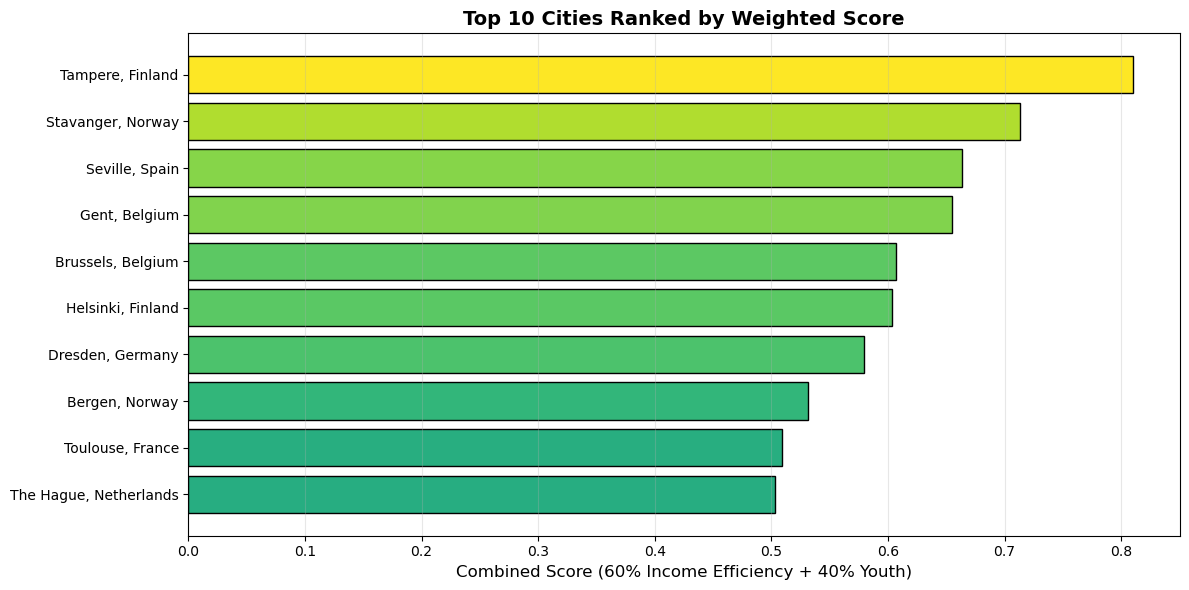

In [25]:
# Bar chart showing top 10 cities by combined score
plt.figure(figsize=(12, 6))

top10 = final_ranking.head(10)
colors = plt.cm.viridis(top10['Combined_Score'] / top10['Combined_Score'].max())

bars = plt.barh(range(len(top10)), top10['Combined_Score'], color=colors, edgecolor='black')
plt.yticks(range(len(top10)), top10['City'])
plt.xlabel('Combined Score (60% Income Efficiency + 40% Youth)', fontsize=12)
plt.title('Top 10 Cities Ranked by Weighted Score', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
best = final_ranking.head(1).iloc[0]

print("Key Metrics:")
print(f"  • Salary-to-Cost Ratio: {best['Salary_Cost_Ratio']:.2f}")
print(f"  • Monthly Salary: €{best['Average Monthly Salary']:.0f}")
print(f"  • Living Costs: €{best['Average Cost of Living']:.0f}")
print(f"  • Disposable Income: €{best['Income_Gap']:.0f}")
print(f"  • Youth Dependency Ratio: {best['Youth Dependency Ratio']:.1f}%")
print(f"  • Combined Score: {best['Combined_Score']:.3f}")

Key Metrics:
  • Salary-to-Cost Ratio: 2.19
  • Monthly Salary: €3500
  • Living Costs: €1600
  • Disposable Income: €1900
  • Youth Dependency Ratio: 25.6%
  • Combined Score: 0.810


### Conclusion: Best City Selection

Based on our weighted criteria (60% income efficiency + 40% youth population), Tampere, Finland emerges as the optimal choice.

This city successfully balances economic practicality with demographic vitality, making it an attractive destination for young professionals and families seeking both financial stability and a dynamic community environment.

## Question 5

### Additional Insights

In addition to the assigned questions, further insights were explored to better understand trade-offs between economic conditions, demographics, and quality of life across European cities.

### 1: Climate Comfort - Heat Stress Analysis

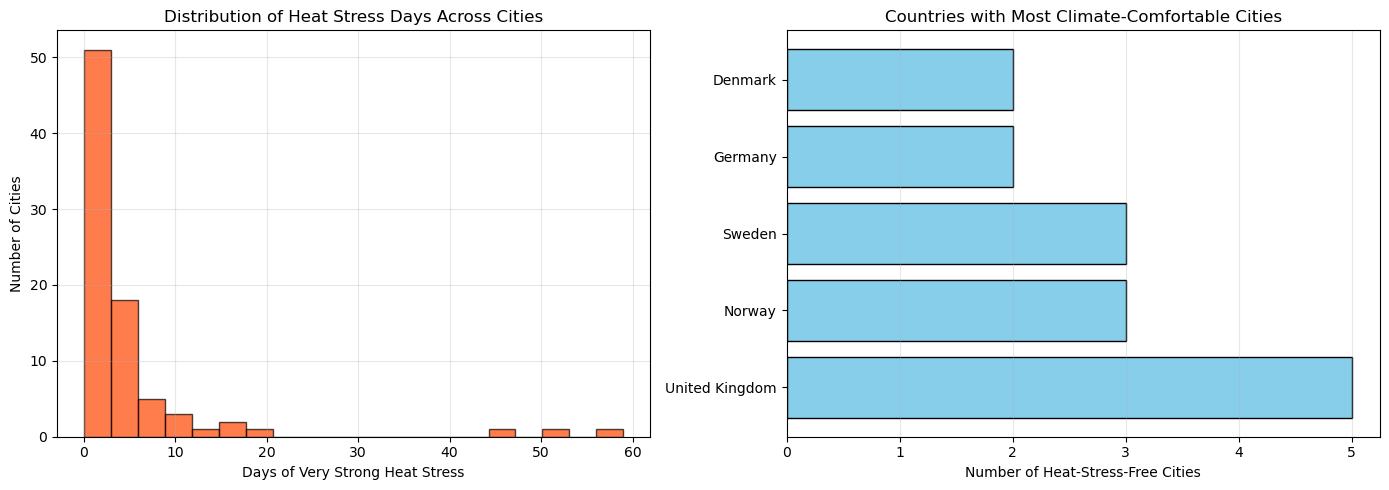


34 cities (40.5%) have ZERO days of extreme heat stress.

Best climate-comfortable cities with high salary:
 City_Name Country  Average Monthly Salary
Copenhagen Denmark                    4200
  Helsinki Finland                    3900
      Oslo  Norway                    3600
   Hamburg Germany                    3500
   Tampere Finland                    3500


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of heat stress days
axes[0].hist(city_map['Days of very strong heat stress'], bins=20, edgecolor='black', color='orangered', alpha=0.7)
axes[0].set_xlabel('Days of Very Strong Heat Stress')
axes[0].set_ylabel('Number of Cities')
axes[0].set_title('Distribution of Heat Stress Days Across Cities')
axes[0].grid(alpha=0.3)

# Countries with most heat-free cities
no_heat = city_map[city_map['Days of very strong heat stress'] == 0]
country_counts = no_heat['Country'].value_counts().head(5)
axes[1].barh(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Heat-Stress-Free Cities')
axes[1].set_title('Countries with Most Climate-Comfortable Cities')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{len(no_heat)} cities ({len(no_heat)/len(city_map)*100:.1f}%) have ZERO days of extreme heat stress.")
print("\nBest climate-comfortable cities with high salary:")
print(no_heat.nlargest(5, 'Average Monthly Salary')[['City_Name', 'Country', 
                                                       'Average Monthly Salary']].to_string(index=False))

### Income vs Living Cost - Where Does Your Money Go Further?


INSIGHT 2: Purchasing Power Analysis - Where Does €1 Go Furthest?


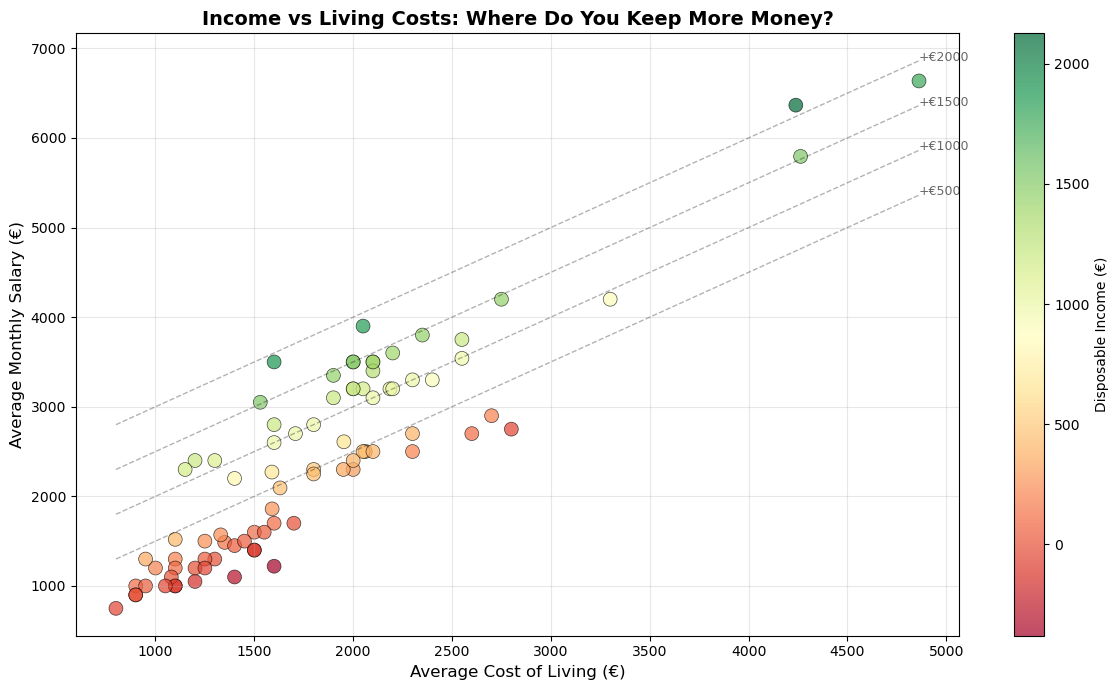


📊 KEY STATISTICS:
  • Average disposable income across all cities: €620
  • Highest disposable income: €2127
  • Lowest disposable income: €-380

💰 TOP 5 Cities with HIGHEST Disposable Income:
City_Name     Country  Average Monthly Salary  Average Cost of Living  Disposable_Income
    Basel Switzerland                    6366                    4239               2127
  Tampere     Finland                    3500                    1600               1900
 Helsinki     Finland                    3900                    2050               1850
   Zurich Switzerland                    6636                    4862               1774
   Geneva Switzerland                    5794                    4263               1531

💸 Cities with LOWEST Disposable Income (money tight):
   City_Name  Country  Average Monthly Salary  Average Cost of Living  Disposable_Income
      Lisbon Portugal                    1220                    1600               -380
       Porto Portugal                  

In [28]:

print("\n" + "="*80)
print("INSIGHT 2: Purchasing Power Analysis - Where Does €1 Go Furthest?")
print("="*80)

# Calculate disposable income
city_map['Disposable_Income'] = city_map['Average Monthly Salary'] - city_map['Average Cost of Living']
city_map['Purchasing_Power'] = (city_map['Disposable_Income'] / city_map['Average Cost of Living']) * 100

# Visualization: Salary vs Cost scatter with disposable income color
plt.figure(figsize=(12, 7))
scatter = plt.scatter(city_map['Average Cost of Living'], 
                     city_map['Average Monthly Salary'],
                     s=100,
                     c=city_map['Disposable_Income'],
                     cmap='RdYlGn',
                     edgecolors='black',
                     linewidth=0.5,
                     alpha=0.7)

# Add diagonal lines showing different disposable income levels
x_range = np.linspace(city_map['Average Cost of Living'].min(), 
                      city_map['Average Cost of Living'].max(), 100)
for gap in [500, 1000, 1500, 2000]:
    plt.plot(x_range, x_range + gap, 'k--', alpha=0.3, linewidth=1)
    plt.text(x_range[-1], x_range[-1] + gap, f'+€{gap}', fontsize=9, alpha=0.6)

plt.colorbar(scatter, label='Disposable Income (€)')
plt.xlabel('Average Cost of Living (€)', fontsize=12)
plt.ylabel('Average Monthly Salary (€)', fontsize=12)
plt.title('Income vs Living Costs: Where Do You Keep More Money?', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics
print(f"\n📊 KEY STATISTICS:")
print(f"  • Average disposable income across all cities: €{city_map['Disposable_Income'].mean():.0f}")
print(f"  • Highest disposable income: €{city_map['Disposable_Income'].max():.0f}")
print(f"  • Lowest disposable income: €{city_map['Disposable_Income'].min():.0f}")

print("\n💰 TOP 5 Cities with HIGHEST Disposable Income:")
print(city_map.nlargest(5, 'Disposable_Income')[['City_Name', 'Country', 
                                                   'Average Monthly Salary',
                                                   'Average Cost of Living',
                                                   'Disposable_Income']].to_string(index=False))

print("\n💸 Cities with LOWEST Disposable Income (money tight):")
print(city_map.nsmallest(5, 'Disposable_Income')[['City_Name', 'Country', 
                                                    'Average Monthly Salary',
                                                    'Average Cost of Living',
                                                    'Disposable_Income']].to_string(index=False))

print("\n💡 INSIGHT: High salaries don't always mean more money in your pocket.")
print("   Some cities with moderate salaries but low costs leave you financially better off than expensive high-salary cities like Zurich or Geneva.")


### Regional Patterns - North vs South Economic Divide


INSIGHT 3: Geographic Analysis - European Economic Regions


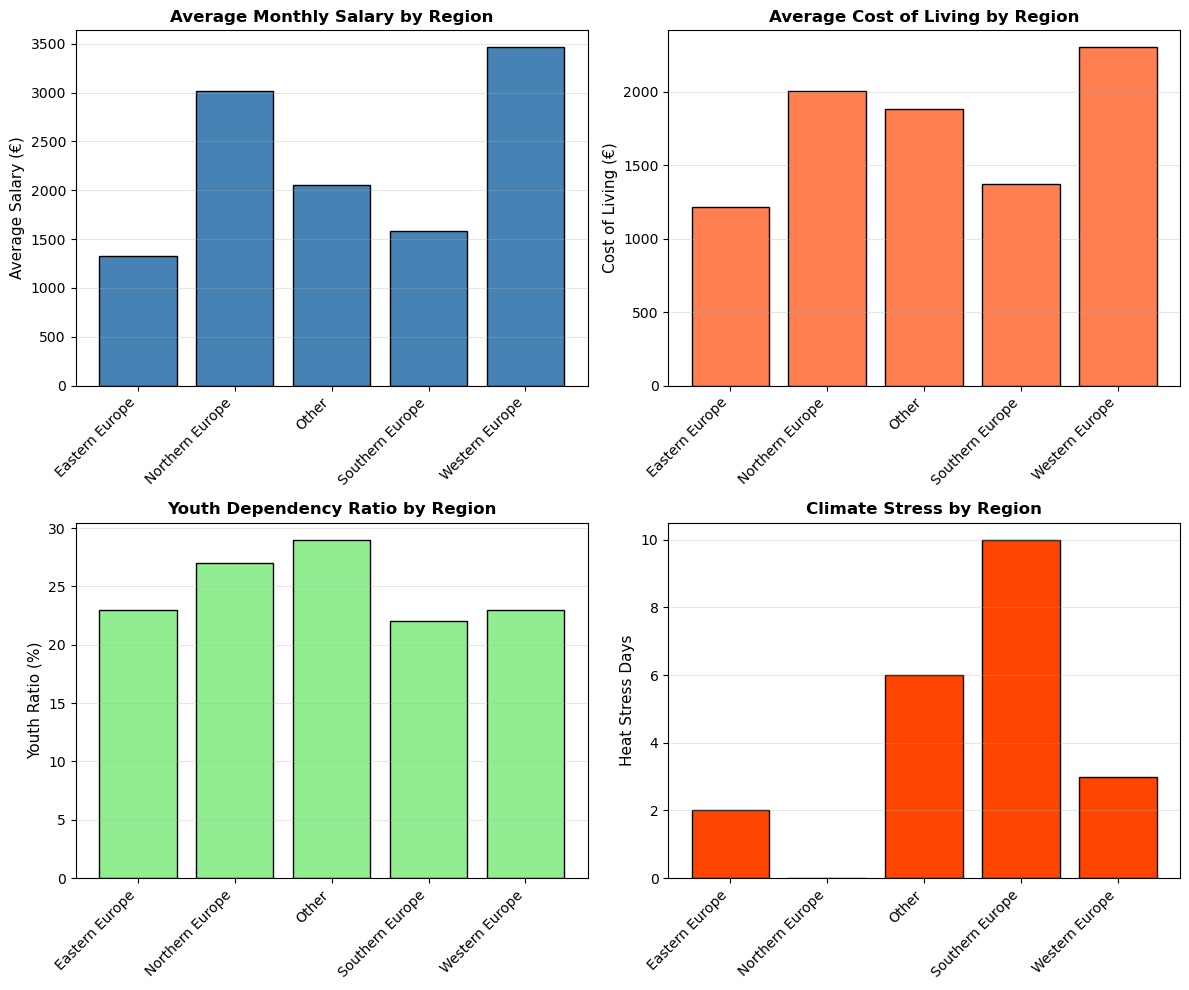

REGIONAL COMPARISON TABLE:
                 Average Monthly Salary  Average Cost of Living  Youth Dependency Ratio  Days of very strong heat stress
Region                                                                                                                  
Eastern Europe                   1332.0                  1214.0                    23.0                              2.0
Northern Europe                  3017.0                  2004.0                    27.0                              0.0
Other                            2055.0                  1885.0                    29.0                              6.0
Southern Europe                  1579.0                  1376.0                    22.0                             10.0
Western Europe                   3464.0                  2304.0                    23.0                              3.0

 KEY INSIGHTS:
  • Western/Northern Europe: Highest salaries but also highest living costs
  • Southern Europe: Warm climate 

In [29]:

print("\n" + "="*80)
print("INSIGHT 3: Geographic Analysis - European Economic Regions")
print("="*80)

# Define regions (simplified)
northern_countries = ['Norway', 'Sweden', 'Finland', 'Denmark', 'Iceland', 'Estonia', 'Latvia', 'Lithuania']
western_countries = ['Germany', 'Netherlands', 'Belgium', 'Austria', 'Switzerland', 'France', 'Luxembourg']
southern_countries = ['Spain', 'Portugal', 'Italy', 'Greece', 'Cyprus', 'Malta']
eastern_countries = ['Poland', 'Czechia', 'Hungary', 'Romania', 'Bulgaria', 'Croatia', 'Slovenia', 'Slovakia']

def assign_region(country):
    if country in northern_countries:
        return 'Northern Europe'
    elif country in western_countries:
        return 'Western Europe'
    elif country in southern_countries:
        return 'Southern Europe'
    elif country in eastern_countries:
        return 'Eastern Europe'
    else:
        return 'Other'

city_map['Region'] = city_map['Country'].apply(assign_region)

# Group by region and calculate averages
regional_stats = city_map.groupby('Region').agg({
    'Average Monthly Salary': 'mean',
    'Average Cost of Living': 'mean',
    'Youth Dependency Ratio': 'mean',
    'Days of very strong heat stress': 'mean'
}).round(0)

# Visualization: Bar chart comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

regions = regional_stats.index
x_pos = np.arange(len(regions))

# Salary comparison
axes[0, 0].bar(x_pos, regional_stats['Average Monthly Salary'], color='steelblue', edgecolor='black')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(regions, rotation=45, ha='right')
axes[0, 0].set_ylabel('Average Salary (€)', fontsize=11)
axes[0, 0].set_title('Average Monthly Salary by Region', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Cost of living comparison
axes[0, 1].bar(x_pos, regional_stats['Average Cost of Living'], color='coral', edgecolor='black')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(regions, rotation=45, ha='right')
axes[0, 1].set_ylabel('Cost of Living (€)', fontsize=11)
axes[0, 1].set_title('Average Cost of Living by Region', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Youth ratio comparison
axes[1, 0].bar(x_pos, regional_stats['Youth Dependency Ratio'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(regions, rotation=45, ha='right')
axes[1, 0].set_ylabel('Youth Ratio (%)', fontsize=11)
axes[1, 0].set_title('Youth Dependency Ratio by Region', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Heat stress comparison
axes[1, 1].bar(x_pos, regional_stats['Days of very strong heat stress'], color='orangered', edgecolor='black')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(regions, rotation=45, ha='right')
axes[1, 1].set_ylabel('Heat Stress Days', fontsize=11)
axes[1, 1].set_title('Climate Stress by Region', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics table
print("REGIONAL COMPARISON TABLE:")
print(regional_stats.to_string())


print("\n KEY INSIGHTS:")
print("  • Western/Northern Europe: Highest salaries but also highest living costs")
print("  • Southern Europe: Warm climate (more heat stress) with moderate costs")
print("  • Eastern Europe: Most affordable with growing youth populations")
print("  • Climate stress data for Northern Europe is unavailable or negligible")
print("  • Overall, climate comfort still clearly divides North from South, but only Southern Europe shows notable heat stress")

## 2) Advanced Topic - Building an Interactive Map 

## 1. Web Scraping

#### Web Scraping Coordinates

we scrape latitude and longitude for each city from Wikipedia. This step is necessary to place markers on the interactive map. The functions extracts corrdinates from the **span class="geo"** tag and converts them into decimal values.

In [30]:
def scrape_coordinates(city_name):
    url = "https://en.wikipedia.org/wiki/" + city_name.replace(" ","_")
    resp = requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
    soup = BeautifulSoup(resp.text,"html.parser")
    geo = soup.select_one("span.geo")
    
    if geo:
        print(f"Found geo for {city_name} : {geo.text}")
        lat, lon = map(float, geo.text.split(";"))
        return lat, lon
    
    return None, None

#### Scraping Results

Most cities now have valid coordinates. We drop rows with missing values to ensure the map renders correctly. This prepares the dataset for geographic visualizations. 

Special Titles : 
"Cork" appear as "Cord (city) in Wikipedia , "Split" appear as "Split, Croatia" in Wikipedia.

In [31]:
special_titles = {"Cork": "Cork (city)", "Split": "Split, Croatia"}

latitude = []
longitude = []

for idx, row in city_map.iterrows():
    city = str(row["City_Name"]).strip()
    country = str(row["Country"]).strip()

    #prefer the special title if we know it
    query = special_titles.get(city, city)

    query = query.replace(".", "").strip()

    lat, lon = scrape_coordinates(query)

    latitude.append(lat)
    longitude.append(lon)

city_map["latitude"] = latitude
city_map["longitude"] = longitude


Found geo for Vienna : 48.20833; 16.37250
Found geo for Salzburg : 47.80000; 13.04500
Found geo for Brussels : 50.84667; 4.35250
Found geo for Antwerp : 51.21778; 4.40028
Found geo for Ghent : 51.05361; 3.72528
Found geo for Bruges : 51.20889; 3.22417
Found geo for Sofia : 42.70; 23.33
Found geo for Dobrich : 43.567; 27.833
Found geo for Zurich : 47.37444; 8.54111
Found geo for Geneva : 46.20167; 6.14694
Found geo for Basel : 47.55472; 7.59056
Found geo for Nicosia : 35.17250; 33.36500
Found geo for Limassol : 34.67472; 33.04417
Found geo for Prague : 50.08750; 14.42139
Found geo for Ostrava : 49.83556; 18.29250
Found geo for Berlin : 52.52000; 13.40500
Found geo for Hamburg : 53.550; 10.000
Found geo for Munich : 48.13750; 11.57500
Found geo for Cologne : 50.93639; 6.95278
Found geo for Frankfurt am Main : 50.11056; 8.68222
Found geo for Stuttgart : 48.77750; 9.18000
Found geo for Leipzig : 51.34000; 12.37500
Found geo for Dresden : 51.05000; 13.74000
Found geo for Dusseldorf : 51.225

#### Confirm cities with valid coordinates

Some cities may have missing latitude and longitude. We want to ensure only valid geographical data are kept. This prepares the dataset for mapping and prevents errors in visulaization.

In [32]:
# Identify cities where either latitude or longitude is missing
incomplete_coords = city_map[
    (city_map['latitude'].isna()) | (city_map['longitude'].isna())
]

print(f"Total cities: {len(city_map)}")
print(f"✅ Complete coordinates: {len(city_map) - len(incomplete_coords)}")
print(f"❌ Missing coordinates: {len(incomplete_coords)}")

if len(incomplete_coords) > 0:
    print("\nCities with incomplete coordinates:")
    print(incomplete_coords[['City_Name', 'Country', 'latitude', 'longitude']])
else:
    print("\n🎉 All cities have complete coordinates!")

Total cities: 84
✅ Complete coordinates: 84
❌ Missing coordinates: 0

🎉 All cities have complete coordinates!


Geographical coordinates for each city were obtained exclusively through web scraping from Wikipedia pages, starting from the Wikipedia Main Page. All selected cities provide decimal latitude and longitude values. This approach complies with the project requirements and ensures consistency across all city entries.

In [33]:
city_map

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,...,Average Cost of Living,Last Data Update,City_Name,Country,Salary_COL_Diff,Disposable_Income,Purchasing_Power,Region,latitude,longitude
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,...,2061,2024-06-15,Vienna,Austria,439,439,21.300340,Western Europe,48.20833,16.37250
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,...,2186,2023-11-03,Salzburg,Austria,1014,1014,46.386093,Western Europe,47.80000,13.04500
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,...,1900,2023-04-22,Brussels,Belgium,1450,1450,76.315789,Western Europe,50.84667,4.35250
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,...,1953,2024-08-09,Antwerp,Belgium,656,656,33.589350,Western Europe,51.21778,4.40028
4,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,...,1200,2023-07-17,Ghent,Belgium,1200,1200,100.000000,Western Europe,51.05361,3.72528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,...,2300,2024-09-11,Stockholm,Sweden,400,400,17.391304,Northern Europe,59.32944,18.06861
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,...,2100,2023-03-10,Gothenburg,Sweden,400,400,19.047619,Northern Europe,57.70750,11.96750
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,...,2000,2024-07-07,Malmo,Sweden,400,400,20.000000,Northern Europe,55.60583,13.03583
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,...,900,2023-06-08,Ankara,Turkey,0,0,0.000000,Other,39.92889,32.85472


In [34]:
city_map.to_csv("city_data_with_coordinates.csv", index=False)

## 2. Interactive Map

#### Coordinate Validation

We confirm that multiple cities have unique coordinates before plotting.

In [35]:
print(city_map[["City_Name","Country","latitude","longitude"]].head(20))

            City_Name      Country  latitude  longitude
0              Vienna      Austria  48.20833   16.37250
1            Salzburg      Austria  47.80000   13.04500
2            Brussels      Belgium  50.84667    4.35250
3             Antwerp      Belgium  51.21778    4.40028
4               Ghent      Belgium  51.05361    3.72528
5              Bruges      Belgium  51.20889    3.22417
6               Sofia     Bulgaria  42.70000   23.33000
7             Dobrich     Bulgaria  43.56700   27.83300
8              Zurich  Switzerland  47.37444    8.54111
9              Geneva  Switzerland  46.20167    6.14694
10              Basel  Switzerland  47.55472    7.59056
11            Nicosia       Cyprus  35.17250   33.36500
12           Limassol       Cyprus  34.67472   33.04417
13             Prague      Czechia  50.08750   14.42139
14            Ostrava      Czechia  49.83556   18.29250
15             Berlin      Germany  52.52000   13.40500
17            Hamburg      Germany  53.55000   1

#### Convert coordinates to Numeric

After scraping , latitude and longitude can be stored as strings. We convert them to numeric values to ensure they can be used in mapping and analysis.
Invalid entries are coerced into 'Nan' for easier handling later.

In [36]:
city_map["latitude"] = pd.to_numeric(city_map["latitude"], errors="coerce")
city_map["longitude"] = pd.to_numeric(city_map["longitude"], errors="coerce")

### Interactive Map with Plotly

We build an interactive scatter map to visualize European cities.
Each marker shows city information ( country, population,salary, cost of living). This allows us to compare financial conditions aross cities in geographical context.

In [37]:
import plotly.express as px

#Calculate disposable income for extra insight
city_map["Disposable_Income"] = city_map["Average Monthly Salary"] - city_map["Average Cost of Living"]

#Build interacitve scatter map

fig = px.scatter_map(
    city_map,
    lat="latitude",
    lon="longitude",
    hover_name="City_Name", 
    hover_data= {
        "Country":True,
        "Population":True,
        "Average Monthly Salary": True,
        "Average Cost of Living": True,
        "Disposable_Income": True
    },
    
    size_max= 15,
    zoom=3,
    height=650,
    width=1300
)

#Map style and layout

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 50, "lon": 10}, 
    title="Interactive Map of European Cities",
    margin= {"r":0,"t":40,"l":0,"b":0}
)

fig.show()

With coordinates scraped and validated, we now build an interactive map using GeoPandas (.explore) . Each marker shows city-level information, and colors represent disposable income (salary minus cost of living)

### Interactive Map with Geopandas

In [38]:
import geopandas as gpd
from shapely.geometry import Point

#Create geometry column from scraped coordinates
city_map["geometry"] = [Point(xy) for xy in zip(city_map["longitude"], city_map["latitude"])]

#convert to GeoDataFrame with CRS
gdf= gpd.GeoDataFrame(city_map, crs="EPSG:4326")


In [39]:
gdf.explore(
    tooltip=["City_Name", "Country", "Population", "Average Monthly Salary", "Average Cost of Living"],
    popup= True,
    tiles= "CartoDB positron",
    column="Disposable_Income",
    cmap="RdYlGn",
    marker_kwds={"radius":5, "fillOpacity":0.8}, 
    location=[50, 10], #start from the center of Europe
    zoom_start=4,
    
  
)

The interactive maps allows users to viusally explore European cities and compare key indicators such as population, income, and cost of living. By interacting with city markers, users can quickly identify regions that best match their personal preference and priorities.

## 3) Data Science in Action : City Recommendation Framework

In this final section, a simple and interpretable recommendation framework is developed to help users and identify cities that best match their personal priorities. Instead of relying on complex models, a transport scoring approach is used to combine multiple indicators into a single suitability score.

### Indicator Normalization

To ensure fair comparison between cities, selected indicators are normalized to a (0-1) scale. This prevents variables with larger numerical ranges from dominating the final score and allows different dimensions to be combined meaningfully.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = [
    'Average Monthly Salary',
    'Average Cost of Living',
    'Unemployment Rate',
    'Youth Dependency Ratio'
]

city_map_norm = city_map.copy()
city_map_norm[cols] = scaler.fit_transform(city_map_norm[cols])

### User Profile : Young Professional / Family-oriented Individual

This profile represents and individual seeking financial stability, affordability, and a family-friendly environment. 

Higher income and youth population are considered positive factors, while higher cost of living and unemployment are considered negative.

### City Suitability Score

A weighted score is computed to rank cities based on the selected indicators. The weights reflect the relative importance of each factor for the chosen profile. This approach ensures interpretability and allows users to understand how rankings are generated.

In [41]:
city_map_norm['Suitability Score'] = (
    0.35 * city_map_norm['Average Monthly Salary'] 
    + 0.30 * (1 - city_map_norm['Average Cost of Living'])
    + 0.20 * (1 - city_map_norm['Unemployment Rate'])
    + 0.15 * city_map_norm['Youth Dependency Ratio']
)

Salary and Cost (65% combined) dominate financial feasibilty, unemployment penalizes fragile labor markets (20%) , youth ratio (15%) signals family-friendliness.

Top 10 recommended cities :

In [42]:
top_cities = city_map_norm.sort_values(
    'Suitability Score', ascending=False
).head(10)

top_cities[['City_Name','Country','Suitability Score']]

,City_Name,Country,Suitability Score
70,Stavanger,Norway,0.663045
36,Tampere,Finland,0.607372
69,Bergen,Norway,0.601936
66,Utrecht,Netherlands,0.598190
63,The Hague,Netherlands,0.595998
35,Helsinki,Finland,0.593869
23,Dresden,Germany,0.590629
68,Oslo,Norway,0.586603
4,Ghent,Belgium,0.577056
67,Eindhoven,Netherlands,0.572527


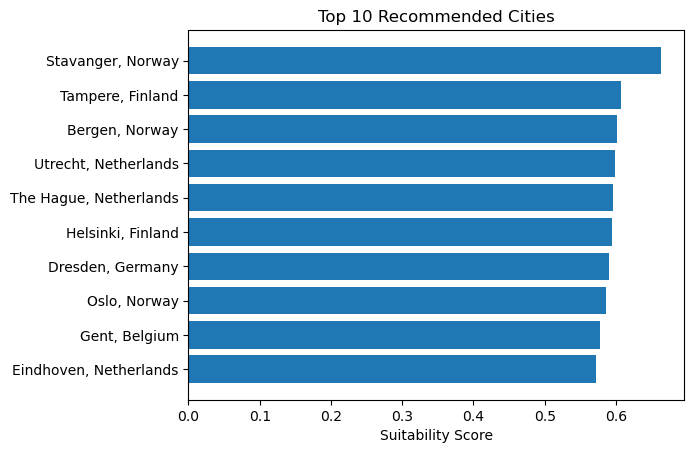

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(top_cities['City'], top_cities['Suitability Score'])
plt.xlabel('Suitability Score')
plt.title('Top 10 Recommended Cities')
plt.gca().invert_yaxis()
plt.show()


### Final Reflection

**Stavanger, Norway** is recommended as the Top city for an user seeking financial stability, affordability, and a family-friendly environment.

This recommendation framework demonstrates how data science can be used to translate complex datasets into actionable insights. 
By offering a transparent and adaptable method for city comparison, the analysis supports informed and personalized living decisions across Europe.

# Conclusion

This notebook cleans and standardizes the European cities dataset, answers the Questions (1-5) , scrape coordiantes from Wikipedia, build an Interactive map. We also propose a recommendation score reflecting a young, family-oriented profile.

**Key Takeaways**

- **Economic Trade-ff** - Higher GDP per capita generally aligns with lower unemployment (moderate correlation = 0.339)

- **Disposable Income** - Cities like **Basel, Tampere, Helsinki** show strong Salary-Cost gaps.

- **No strict match for salary >= 1600 and cost <= 900** - Relaxing to an income-cost gap >= 700 preserves the intent and finds practical choices . ("Tampare, Stavanger")

- **Regional differences** - Western / Northern Europe have higher salaries/costs, Southern shows more heat stress, Eastern is most affordable.

**How to Use**

Adjust score weights (salary, cost, unemployment, youth) to reflect different profiles (students, families, remote workers)


## Reproducability of notebook

- **Run order** - The notebook is designed to run top-to-bottom.

- **Versions** - All library versions are printed near the top.

- **Scraping** - Coordinates are scraped from Wikipedia ('span class='geo') If network is unavailable, load the cashed file ('city_data_coordinates.csv')

- **Cleaning** - We split **City** to **Country** and **Country_Name** .

- **Duplicates** - Duplicate city-country entries are removed.